In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [45]:
df=pd.read_csv(r"C:\Users\jagad\Downloads\diabetes_prediction_dataset.csv (1).zip")

In [47]:
encoder=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
scaler=StandardScaler()

In [49]:
Nominal_Columns=['gender','smoking_history']
Nominal_transformed_df=encoder.fit_transform(df[Nominal_Columns])
df=pd.concat([df,Nominal_transformed_df],axis=1).drop(columns=Nominal_Columns)

In [51]:
scaling_column=['age','bmi','HbA1c_level','blood_glucose_level']
scaler=StandardScaler()
df[scaling_column]=scaler.fit_transform(df[scaling_column])

In [53]:
X=df.drop(columns=['diabetes'])
y=df['diabetes']

In [55]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.33,random_state=42,
                                              stratify=y)

#### Modelling using LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel=LogisticRegression()

In [61]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [63]:
predictions = logmodel.predict(X_test)

In [65]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
logmodel.classes_

array([0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30195
           1       0.85      0.64      0.73      2805

    accuracy                           0.96     33000
   macro avg       0.91      0.81      0.86     33000
weighted avg       0.96      0.96      0.96     33000

recall score0.6395721925133689


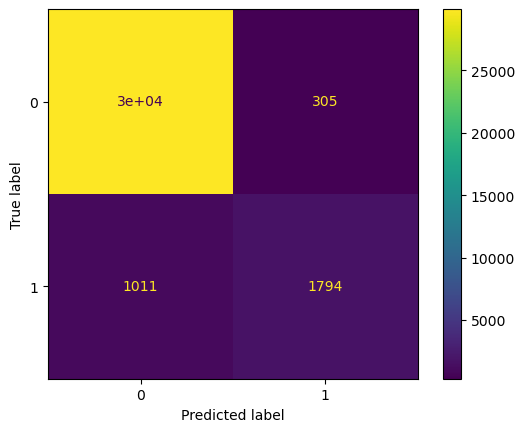

In [71]:
print(classification_report(y_test,predictions))
print(f"recall score{recall_score(y_test,predictions)}")
cm = confusion_matrix(y_test, predictions ,labels=logmodel.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel.classes_)
cm_disp.plot()

#### Modelling using RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
y_predict=rf.predict(X_test)

In [77]:
rf.score(X_test,y_test)

0.9704848484848485

In [78]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30195
           1       0.95      0.69      0.80      2805

    accuracy                           0.97     33000
   macro avg       0.96      0.84      0.89     33000
weighted avg       0.97      0.97      0.97     33000



In [83]:
features = pd.DataFrame(rf.feature_importances_,index = X.columns)

In [85]:
features.head()

,0
age,0.103367
hypertension,0.017177
heart_disease,0.011584
bmi,0.121793
HbA1c_level,0.394145


In [87]:
rf2 =  RandomForestClassifier(n_estimators = 1000,
                              criterion ='entropy',
                              min_samples_split=10,
                              max_depth = 14,
                              random_state = 42
)

In [89]:
rf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [90]:
rf2.score(X_test,y_test)

0.9725454545454545

In [91]:
rf2.feature_importances_

array([9.95616118e-02, 2.22688376e-02, 1.39105482e-02, 6.48953355e-02,
       4.48370089e-01, 3.36382270e-01, 3.40042490e-03, 5.78719127e-06,
       1.68211762e-03, 1.56062741e-03, 4.07748879e-03, 2.16453713e-03,
       1.72032494e-03])

In [92]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [93]:
y_predict2 = rf2.predict(X_test)

In [94]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     30195
           1       0.99      0.68      0.81      2805

    accuracy                           0.97     33000
   macro avg       0.98      0.84      0.90     33000
weighted avg       0.97      0.97      0.97     33000



              precision    recall  f1-score   support

           0       0.97      1.00      0.99     30195
           1       0.99      0.68      0.81      2805

    accuracy                           0.97     33000
   macro avg       0.98      0.84      0.90     33000
weighted avg       0.97      0.97      0.97     33000

recall score0.6823529411764706


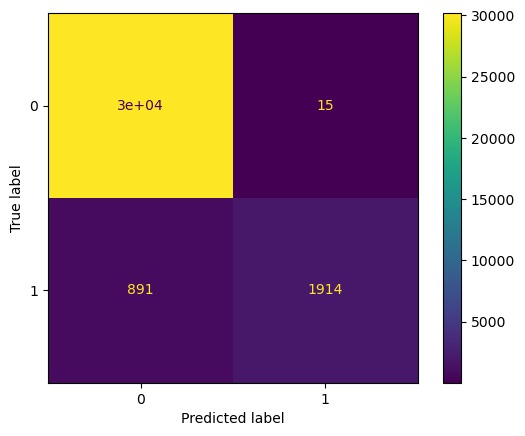

In [95]:
print(classification_report(y_test,y_predict2))
print(f"recall score{recall_score(y_test,y_predict2)}")
cm = confusion_matrix(y_test,y_predict2)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_disp.plot()

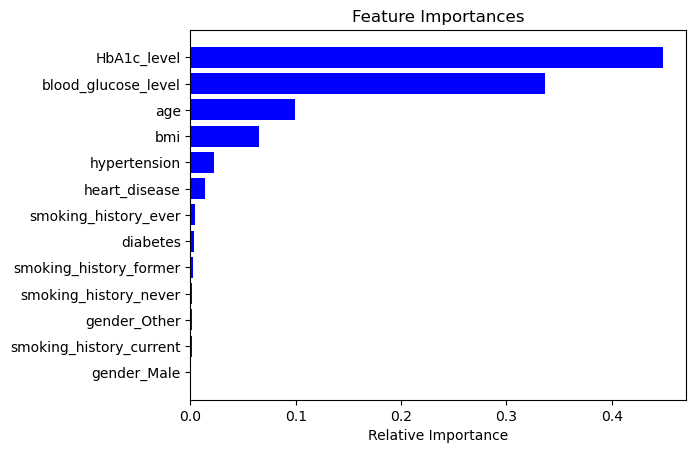

In [96]:
import numpy as np
import matplotlib.pyplot as plt
feature = df.columns
importances = rf2.feature_importances_ 
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()